<a href="https://colab.research.google.com/github/kwyvanessa/Datathon_2022/blob/Train-Test-Split/WID_Datathon_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datathon 2022

## Problem Statement

Preliminary Problem Statement:  What are the three most influential indicators of the gender pay gap 

# Import Data

In [100]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from google.colab import drive

## UN Human Development Reports data

[Data Dictionary](https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_metadata.xlsx) <br>

This dataset from the [UNHDR](https://hdr.undp.org/data-center) includes time series data for several UN HDC indices and supporting measurements in a single tabular file. The full original dataset can be downloaded from UNHDR [here](https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_complete_time_series.csv).   <br>

The original datset includes annual data in columnar format.  We used Tableau Prep to quickly transform the annual data into a row format, with one row for each Country/Year combination, and a single column for each variable.

Glossary of column prefixes <br>
country: Country that data relates to <br>
year: Year of measurment <br>
region: Developing region: (AS: Arab States (20); EAP: East Asia and Pacific (26); ECA: Europe and Central Asia (17); LAC: Latin America and Caribbean (33); SA: South Asia (9); SSA: Sub Saharan Africa) <br>
hdi: Human Development Index<br>
gdi:  Gender Development Index<br>
gii: Gender inequality index<br>
phdi: planetary pressures adjusted HDI<br>
ihdi: Inequality-adjusted HDI<br>
le: life expectancy<br>
gnipc: Gross National Income per capita<br>
mys: Mean years of schooling<br>
eys: Expected Years of Schooling<br>


mmr: Material mortality rate<br>
abr: Adolescent birth rate <br>
se: population with atleast some secondary ed<br>
pr: share of seats in parliament<br>
lfpr: labor force participation rate<br>

co2_prod: Co2 emissions per capita<br>
coef_inc: Coefficient of inequality<br>
ineq_le: Inequality in life expectancy<br>
ineq_inc: Inequality in income


In [101]:
# Use curl to retrieve transformed csv file from github repo and save in Colab working director
!curl -O "https://raw.githubusercontent.com/kwyvanessa/Datathon_2022/main/hdrDF_by_year_data.csv"

# Read in the csv from the Colab working directory - using a subset of the columns, and parse_dates are enabled to format of the datetime strings. I
hdrDF_y = pd.read_csv("/content/hdrDF_by_year_data.csv",\
                      usecols = ['iso3','country','region', 'hdicode','Year','hdi','le','mys', 'eys','gnipc','gdi','ihdi','coef ineq','ineq le', 'ineq inc', 'gii','mmr','abr','pr f','lfpr f', 'lfpr m', 'se f', 'se m'],\
                      infer_datetime_format= True)
# Rename columns for consistency of style
hdrDF_y.rename({'coef ineq':'coef_ineq','se m':'se_m','se f':'se_f','pr f':'pr_f','ineq le':'ineq_le','ineq inc':'ineq_inc', 'Year':'date', 'lfpr m': 'lfpr_m', 'lfpr f': 'lfpr_f'}, axis =1, inplace = True)

hdrDF_y['date'] = pd.to_datetime(hdrDF_y['date'], format = '%m/%d/%Y') # convert the date column to datetime format
hdrDF_y['year'] = hdrDF_y['date'].dt.year # create a new column for the Year of the observation
hdrDF_y.sample(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2023k  100 2023k    0     0  3568k      0 --:--:-- --:--:-- --:--:-- 3562k


,iso3,hdicode,region,date,country,hdi,coef_ineq,se_m,se_f,pr_f,...,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,eys,abr,year
3358,ZZF.EAP,NaN,NaN,2018-01-01,East Asia and the Pacific,0.741,16.041775,76.859395,69.631650,20.250675,...,75.835426,8.789250,25.893836,0.620,13904.115010,0.335,0.975,13.670623,23.310035,2018
3774,SGP,Very High,EAP,1991-01-01,Singapore,0.737,NaN,43.082539,37.875085,4.761905,...,75.328900,NaN,NaN,NaN,39286.235650,0.244,NaN,10.802198,7.996000,1991
6382,PRY,High,LAC,2020-01-01,Paraguay,0.730,18.441855,53.978741,52.540852,17.600000,...,73.181600,11.731340,30.441064,0.592,12015.543960,0.446,0.986,12.987991,71.302000,2020
6150,YEM,Low,AS,2004-01-01,Yemen,0.483,NaN,17.328000,4.518000,0.332226,...,65.005900,NaN,NaN,NaN,3593.508139,0.821,0.660,8.767920,98.376000,2004
4059,LVA,Very High,NaN,1998-01-01,Latvia,0.733,NaN,84.456716,84.537213,9.000000,...,69.162800,NaN,NaN,NaN,11171.674480,0.327,1.021,12.889680,18.737000,1998
4892,GTM,Medium,LAC,2001-01-01,Guatemala,0.556,NaN,19.216981,16.154625,8.849558,...,67.946400,NaN,NaN,NaN,6466.899759,0.580,0.893,8.655271,110.434000,2001
3685,URY,Very High,LAC,2005-01-01,Uruguay,0.768,NaN,49.763874,52.409047,10.769231,...,76.193500,NaN,NaN,NaN,14226.026790,0.366,1.011,15.210780,68.171000,2005
6548,JAM,High,LAC,2019-01-01,Jamaica,0.719,15.881512,66.381982,74.331019,19.047619,...,71.767000,9.162585,31.966160,0.599,9503.655135,0.363,0.994,13.404920,33.952000,2019
4383,BGD,Medium,SA,2007-01-01,Bangladesh,0.527,NaN,37.197441,26.561139,15.072464,...,66.714400,NaN,NaN,NaN,2702.966271,0.634,0.817,8.862530,123.323000,2007
2760,IRQ,Medium,AS,1994-01-01,Iraq,0.543,NaN,34.027306,18.343751,6.400000,...,66.744200,NaN,NaN,NaN,3962.587742,0.705,NaN,9.163030,71.735000,1994


In [102]:
hdrDF_y.drop(labels = hdrDF_y.loc[hdrDF_y['iso3'].str.contains('ZZ') == True], axis = 0, errors='ignore', inplace = True)        
hdrDF_y

,iso3,hdicode,region,date,country,hdi,coef_ineq,se_m,se_f,pr_f,...,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,eys,abr,year
0,DJI,Low,AS,2009-01-01,Djibouti,0.445,NaN,NaN,NaN,13.846154,...,59.6727,NaN,NaN,NaN,2803.308019,NaN,NaN,5.583350,24.647,2009
1,BLZ,Medium,LAC,2001-01-01,Belize,0.643,NaN,54.882461,54.105932,13.513514,...,68.3572,NaN,NaN,NaN,6175.395903,0.509,0.924,11.864430,99.264,2001
2,SVN,Very High,NaN,2015-01-01,Slovenia,0.903,5.297673,98.930481,97.439178,27.692308,...,80.8218,2.487548,11.17606,0.854,32738.328430,0.063,1.003,17.291990,4.679,2015
3,MLT,Very High,NaN,2005-01-01,Malta,0.832,NaN,67.836281,58.782822,9.230769,...,79.6465,NaN,NaN,NaN,28205.895980,0.285,0.923,14.814800,20.183,2005
4,ROU,Very High,NaN,1994-01-01,Romania,0.682,NaN,78.510602,65.954482,5.555556,...,69.5789,NaN,NaN,NaN,11361.396570,0.482,0.957,10.283660,46.290,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6587,PAK,Low,SA,2006-01-01,Pakistan,0.493,NaN,44.042240,19.914881,20.361991,...,63.7312,NaN,NaN,NaN,3761.372437,0.614,0.694,6.281110,60.166,2006
6588,COL,High,LAC,1991-01-01,Colombia,0.619,NaN,42.369342,42.013230,9.811321,...,68.8127,NaN,NaN,NaN,7978.104071,0.531,0.955,9.490810,96.557,1991
6589,GRD,High,LAC,1997-01-01,Grenada,NaN,NaN,NaN,NaN,NaN,...,72.5677,NaN,NaN,NaN,8826.030278,NaN,NaN,15.529503,63.858,1997
6590,FRA,Very High,NaN,1994-01-01,France,0.823,NaN,59.911082,51.941091,9.020045,...,77.7678,NaN,NaN,NaN,34801.772780,0.202,0.982,15.589100,10.020,1994


## UN Women Data Hub Wage Data

Data on Average Hourly Wage by gender, country and year was sourced from the [UN Women SDG Indicators Dashboard](https://data.unwomen.org/data-portal).<br>
The Average Hourly Wage data is averaged for all occupations.<br>
This dataset will be used to calculate a 'Wage Ratio' to estimate the target variable of the gender pay gap.  The Wage Ratio is calculated below as the Average Hourly Wage (Female) divided by the Average Hourly Wage (Male). 

In [103]:
# Use curl to get csv file from github repo and save in Colab working directory
!curl -O "https://raw.githubusercontent.com/kwyvanessa/Datathon_2022/main/UNWDH_wages_all.csv"
# Read in the csv from the working directory  - using a subset of the columns.
wages = pd.read_csv("/content/UNWDH_wages_all.csv", usecols = ['REF_AREA Description','TIME_PERIOD','OBS_VALUE','Sex'])
#rename columns
wages.rename({'REF_AREA Description': 'Country', 'TIME_PERIOD': 'Year', 'OBS_VALUE': 'avgHrlyWage'},axis=1, inplace = True) 
#Filter the data
wages = wages.loc[wages['Sex'].isin(['Female','Male'])]
wages.sample(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  629k  100  629k    0     0  1208k      0 --:--:-- --:--:-- --:--:-- 1206k


,Country,Year,avgHrlyWage,Sex
165,Slovakia,2014,5.9,Male
729,Argentina,2004,4.7,Female
204,Paraguay,2010,7303.4,Female
837,Bolivia (Plurinational State of),2007,7.8,Female
49,Sweden,2018,189.5,Female
180,Slovenia,2018,10.0,Male
1416,Brazil,2011,11.1,Male
1269,Honduras,2009,41.1,Female
924,Costa Rica,2012,2520.8,Female
589,Panama,2013,4.1,Male


In [104]:
#Pivot the data
wages_wide_mi = wages.pivot(index = ['Country', 'Year'], columns = 'Sex', values = ['avgHrlyWage'])
#drop the multilevel column index
wages_wide_mi.columns = wages_wide_mi.columns.droplevel(0)
#remove the multilevel index
wages_wide = wages_wide_mi.reset_index()
wages_wide.sample(10)

Sex,Country,Year,Female,Male
82,Brunei Darussalam,2014,12.0,11.8
307,Nepal,2017,87.8,102.7
351,Peru,2003,3.5,4.3
188,Finland,2010,16.2,20.4
404,Slovenia,2010,9.1,9.1
240,Iceland,2016,2920.0,3610.0
343,Paraguay,2015,11747.1,11860.8
383,Republic of Korea,2016,14220.0,21412.0
25,Austria,2018,15.2,19.0
429,Timor-Leste,2010,1.1,1.0


In [105]:
# Add a new calculated field for the ratio of Female wages in a given year and country as a percentage of Male wages
wages_wide['wage_ratio'] = wages_wide['Female'] / wages_wide['Male']
wages_wide.sample(10)

Sex,Country,Year,Female,Male,wage_ratio
392,Samoa,2012,7.9,8.6,0.918605
356,Peru,2008,4.3,5.4,0.796296
408,Spain,2010,10.4,12.4,0.838710
232,Honduras,2016,43.4,34.5,1.257971
141,Dominican Republic,2013,82.5,85.2,0.968310
38,Bolivia (Plurinational State of),2002,5.8,6.3,0.920635
197,Germany,2010,14.6,18.8,0.776596
228,Honduras,2012,44.8,38.7,1.157623
209,Guatemala,2011,13.2,12.1,1.090909
448,Uruguay,2003,36.2,41.7,0.868106


In [106]:
# Drop unneeded columns, rename columns
wages_wide.drop(['Female','Male'], axis =1, inplace = True, errors = 'ignore')
wages_wide.rename({'Country':'country','Year':'year'}, axis = 1, inplace = True)
wages_wide.sample(10)

Sex,country,year,wage_ratio
221,Honduras,2004,0.990868
327,Panama,2013,1.024390
155,Ecuador,2010,0.954545
76,Brazil,2014,0.851852
399,Serbia,2019,0.911304
80,Brazil,2018,0.869863
106,Costa Rica,2004,1.024121
60,Bosnia and Herzegovina,2017,0.886364
452,Uruguay,2007,0.889752
264,Lebanon,2019,1.409669


## Merge Dataframes
Combine the UNHDR data with the UN Wage Data to produce a single dataframe for analysis<br>

In [107]:
# Compare country column from each dataframe
print(f"wages: {wages_wide['country'].nunique()}")
print(f"hdrDF {hdrDF_y['country'].nunique()}")

wages: 102
hdrDF 206


In [108]:
# Rename country values to make consistent between the two datasets
wages_wide.loc[wages_wide['country'] == 'Republic of Korea'] = 'Korea (Republic of)' # Korea
wages_wide.loc[wages_wide['country'] == 'United Kingdom of Great Britain and Northern Ireland'] = 'United Kingdom' # United Kingdom
hdrDF_y.loc[hdrDF_y['country'] == 'Eswatini (Kingdom of)'] = 'Eswatini' #Eswatini

In [109]:
# Merge datasets
paygap = pd.merge(hdrDF_y, wages_wide, how = 'inner', on = ['country','year'])
paygap.sample(10)

,iso3,hdicode,region,date,country,hdi,coef_ineq,se_m,se_f,pr_f,...,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,eys,abr,year,wage_ratio
301,CYP,Very High,NaN,2014-01-01 00:00:00,Cyprus,0.865,11.012768,81.11483,77.014488,12.5,...,2.847974,17.50429,0.768,32270.91228,0.117,0.98,14.25613,5.293,2014,0.865546
248,DOM,High,LAC,2006-01-01 00:00:00,Dominican Republic,0.683,NaN,39.556956,41.137291,17.142857,...,NaN,NaN,NaN,10546.32662,0.488,0.956,12.331158,101.253,2006,0.91231
184,ROU,Very High,NaN,2014-01-01 00:00:00,Romania,0.811,10.520647,92.243301,86.119278,11.663808,...,6.918,18.66331,0.724,23006.38141,0.316,0.987,14.624407,36.568,2014,0.952756
277,VEN,Medium,LAC,2004-01-01 00:00:00,Venezuela (Bolivarian Republic of),0.707,NaN,41.562736,44.693506,9.69697,...,NaN,NaN,NaN,15485.932,0.522,0.981,12.02496,90.442,2004,0.992273
230,ECU,High,LAC,2014-01-01 00:00:00,Ecuador,0.76,18.20978,49.364609,48.244808,41.605839,...,10.596791,29.851789,0.618,11887.546,0.396,0.958,15.055005,80.124,2014,1.074074
235,WSM,High,EAP,2012-01-01 00:00:00,Samoa,0.709,NaN,70.3925,75.675971,4.081633,...,11.921605,NaN,NaN,5683.651395,0.482,0.958,12.252976,50.659,2012,0.918605
114,PAN,Very High,LAC,2009-01-01 00:00:00,Panama,0.769,NaN,58.645588,61.515773,8.450704,...,NaN,NaN,NaN,19485.59856,0.509,0.992,12.74952,92.85,2009,1.0
28,SLV,Medium,LAC,2004-01-01 00:00:00,El Salvador,0.636,NaN,35.750783,23.643671,10.714286,...,NaN,NaN,NaN,6517.95534,0.498,0.939,12.34562,82.695,2004,1.0
435,BGD,Medium,SA,2017-01-01 00:00:00,Bangladesh,0.622,23.575913,46.800072,38.46088,20.285714,...,17.76227,15.65692,0.471,4339.489843,0.534,0.902,11.59809,78.29,2017,1.070085
295,SLV,Medium,LAC,2012-01-01 00:00:00,El Salvador,0.664,21.643386,43.569901,36.815922,26.190476,...,12.355422,25.859547,0.519,7447.703934,0.404,0.966,12.67521,70.643,2012,1.0


In [110]:
print(f"paygap {paygap['iso3'].unique()}")

paygap ['MYS' 'BRA' 'ARG' 'JAM' 'ESP' 'URY' 'GTM' 'JOR' 'MEX' 'PRT' 'SVK' 'PER'
 'VEN' 'BEL' 'NOR' 'CZE' 'SLV' 'UGA' 'SWE' 'GRC' 'TON' 'BRN' 'CMR' 'HND'
 'ROU' 'RUS' 'IRL' 'ISL' 'KHM' 'ECU' 'GHA' 'LKA' 'ITA' 'PRY' 'MLT' 'ZMB'
 'MMR' 'CHL' 'VNM' 'HRV' 'BIH' 'BOL' 'CRI' 'PAN' 'ISR' 'ARM' 'BLZ' 'TCD'
 'MUS' 'LTU' 'FIN' 'DOM' 'COL' 'MNE' 'UKR' 'BLR' 'PAK' 'ALB' 'RWA' 'LVA'
 'IDN' 'SRB' 'POL' 'DEU' 'SVN' 'AUT' 'EST' 'MKD' 'NIC' 'TGO' 'TLS' 'DNK'
 'BGR' 'ZWE' 'LBN' 'WSM' 'HTI' 'MDV' 'NLD' 'MLI' 'LUX' 'CYP' 'GUY' 'MWI'
 'CPV' 'LAO' 'TUR' 'CHE' 'FRA' 'BFA' 'MNG' 'HUN' 'NPL' 'GMB' 'BWA' 'MDG'
 'ZAF' 'BGD']


# Prelminary Exploratory Data Analysis

## Shapes, Sizes, and Info

In [111]:
# convert indices from object type to float64
paygap[['hdi','coef_ineq','se_m','se_f','pr_f','mys','eys','mmr','lfpr_m','lfpr_f','le','ineq_le','ineq_inc','ihdi','gnipc','gii','gdi','abr','wage_ratio']] \
  = paygap[['hdi','coef_ineq','se_m','se_f','pr_f','mys','eys','mmr','lfpr_m','lfpr_f','le','ineq_le','ineq_inc','ihdi','gnipc','gii','gdi','abr','wage_ratio']].astype(np.float64)


In [112]:
# rows and columns of dataframe
paygap_sh = paygap.shape    # number of instances (rows) and features (cols)
paygap_sz = paygap.size     # the number of elements
paygap_col = paygap.columns # to know just the names of the columns or features

print(f"paygap dataframe: \n\n\
 shape (rows|cols): {paygap_sh}\n \
size: {paygap_sz}\n\n \
Features|Columns\n{paygap_col}")

paygap dataframe: 

 shape (rows|cols): (466, 25)
 size: 11650

 Features|Columns
Index(['iso3', 'hdicode', 'region', 'date', 'country', 'hdi', 'coef_ineq',
       'se_m', 'se_f', 'pr_f', 'mys', 'mmr', 'lfpr_m', 'lfpr_f', 'le',
       'ineq_le', 'ineq_inc', 'ihdi', 'gnipc', 'gii', 'gdi', 'eys', 'abr',
       'year', 'wage_ratio'],
      dtype='object')


In [113]:
# Displays the concise summary of dataframe
paygap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 465
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso3        466 non-null    object 
 1   hdicode     466 non-null    object 
 2   region      354 non-null    object 
 3   date        466 non-null    object 
 4   country     466 non-null    object 
 5   hdi         466 non-null    float64
 6   coef_ineq   303 non-null    float64
 7   se_m        466 non-null    float64
 8   se_f        466 non-null    float64
 9   pr_f        465 non-null    float64
 10  mys         466 non-null    float64
 11  mmr         466 non-null    float64
 12  lfpr_m      466 non-null    float64
 13  lfpr_f      466 non-null    float64
 14  le          466 non-null    float64
 15  ineq_le     336 non-null    float64
 16  ineq_inc    312 non-null    float64
 17  ihdi        303 non-null    float64
 18  gnipc       466 non-null    float64
 19  gii         465 non-null    f

## Total count of null values for all the attributes

In [114]:
print("Columns with missing values: ")
print(paygap.columns[paygap.isnull().any()].tolist())

Columns with missing values: 
['region', 'coef_ineq', 'pr_f', 'ineq_le', 'ineq_inc', 'ihdi', 'gii', 'gdi']


In [115]:
# to know just the missing values
print(paygap.isnull().sum())

iso3            0
hdicode         0
region        112
date            0
country         0
hdi             0
coef_ineq     163
se_m            0
se_f            0
pr_f            1
mys             0
mmr             0
lfpr_m          0
lfpr_f          0
le              0
ineq_le       130
ineq_inc      154
ihdi          163
gnipc           0
gii             1
gdi            11
eys             0
abr             0
year            0
wage_ratio      0
dtype: int64


In [116]:
print(paygap.columns[paygap.notnull().any()].tolist())

['iso3', 'hdicode', 'region', 'date', 'country', 'hdi', 'coef_ineq', 'se_m', 'se_f', 'pr_f', 'mys', 'mmr', 'lfpr_m', 'lfpr_f', 'le', 'ineq_le', 'ineq_inc', 'ihdi', 'gnipc', 'gii', 'gdi', 'eys', 'abr', 'year', 'wage_ratio']


In [117]:
# to know just the non null values
total_nn = paygap.count() - paygap.isnull().sum()
print(total_nn)

iso3          466
hdicode       466
region        242
date          466
country       466
hdi           466
coef_ineq     140
se_m          466
se_f          466
pr_f          464
mys           466
mmr           466
lfpr_m        466
lfpr_f        466
le            466
ineq_le       206
ineq_inc      158
ihdi          140
gnipc         466
gii           464
gdi           444
eys           466
abr           466
year          466
wage_ratio    466
dtype: int64


##Summary statistics 

In [118]:
# Summary statistics of the categorical values
paygap.describe(include ='object')

,iso3,hdicode,region,date,country,year
count,466,466,354,466,466,466
unique,98,4,6,20,98,20
top,URY,Very High,LAC,2014-01-01 00:00:00,Uruguay,2014
freq,20,205,248,58,20,58


In [119]:
#Summary stats of the numerical values
paygap.describe()

,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr_m,lfpr_f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,eys,abr,wage_ratio
count,466.000000,303.000000,466.000000,466.000000,465.000000,466.000000,466.000000,466.000000,466.00000,466.000000,336.000000,312.000000,303.000000,466.000000,465.000000,455.000000,466.000000,466.000000,466.000000
mean,0.751039,16.056786,61.551740,58.027826,22.036192,8.794934,74.343348,73.861345,50.80470,74.493557,9.841796,23.694218,0.655604,18821.437044,0.344092,0.966123,14.070655,52.527361,0.918658
std,0.109524,7.513541,22.810320,23.479041,11.101790,2.474408,102.269884,7.800669,10.01434,5.197888,7.338418,9.244248,0.147991,15101.125426,0.163534,0.038784,2.429924,34.600342,0.112282
min,0.398000,4.361375,13.447695,7.278934,4.081633,1.722000,2.000000,51.253000,13.99600,52.825300,2.241741,8.524723,0.248000,1386.630627,0.018000,0.754000,7.372990,2.403000,0.578431
25%,0.682250,9.414089,44.801964,41.124745,12.658228,7.144636,12.000000,67.927500,45.00850,71.850575,3.978500,17.292341,0.557500,7742.419544,0.189000,0.952000,12.556516,14.779750,0.846181
50%,0.756500,15.386575,57.203491,54.986659,19.298246,8.585040,49.500000,74.508000,50.48800,74.733950,7.501820,22.255390,0.661000,13830.985270,0.384000,0.974000,14.017362,63.397500,0.907932
75%,0.825000,21.641622,80.742622,76.303873,30.120482,10.562890,94.000000,80.115000,55.62200,77.581950,12.630746,30.486791,0.776500,24071.385067,0.471000,0.989000,15.750488,77.370250,0.982764
max,0.962000,37.399747,100.000000,100.000000,55.660377,14.037120,1140.000000,89.522000,83.87600,83.561500,40.849140,56.996000,0.913000,83495.108300,0.690000,1.036000,19.762920,167.138000,1.409669


In [120]:
# For the dataframe group numeric features by each categorical feature 
# Displays categorical features noted above that have unique (2nd row) features < 100
for column in paygap.select_dtypes(include='object'):
    if paygap[column].nunique() < 100:
        display(paygap.groupby(column).mean())
     

,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr_m,lfpr_f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,eys,abr,wage_ratio
iso3,,,,,,,,,,,,,,,,,,,
ALB,0.806000,10.554499,92.903100,94.975638,27.857143,11.096983,15.00,67.247000,51.189000,79.183800,6.151076,13.178980,0.720000,13302.705960,0.164000,0.997000,14.695620,15.580000,0.930693
ARG,0.817688,14.121856,59.890257,59.597865,34.821791,10.219403,54.75,73.907813,48.814687,75.447894,8.933991,26.959373,0.719667,20253.786434,0.370375,0.993062,16.560164,64.798000,0.985537
ARM,0.768667,9.301325,97.320207,96.389146,15.289399,11.355898,26.50,66.023000,46.685167,74.761117,8.341976,16.377033,0.695833,12364.387790,0.281333,0.987833,13.047125,22.742667,0.803187
AUT,0.909333,6.555226,99.236799,95.457353,31.514442,11.979095,5.00,66.870333,55.118667,81.180267,3.559078,13.418627,0.848333,53282.154527,0.085000,0.967333,15.972123,8.078667,0.780201
BEL,0.923400,7.988661,85.976582,81.601356,41.497091,11.848347,5.40,59.330000,48.215400,80.949740,3.714070,11.895122,0.849200,49916.145472,0.067200,0.972200,19.558594,7.356200,0.912481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,0.681800,17.552416,70.365725,60.435123,25.443762,7.990619,45.00,81.200600,71.640500,73.837100,13.813202,21.558357,0.563778,6020.846143,0.312200,1.000100,12.712967,35.153800,0.928866
WSM,0.712500,NaN,70.987711,77.401729,7.040816,11.572509,47.50,54.838500,31.381000,72.378400,11.521961,NaN,NaN,5985.662208,0.444500,0.971000,12.304814,48.576000,1.110618
ZAF,0.736000,31.216062,87.666222,68.897713,45.333333,11.373160,119.00,62.433000,48.453000,66.175000,19.358057,56.996000,0.485000,13366.474640,0.410000,0.954000,13.643710,64.982000,0.904762


,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr_m,lfpr_f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,eys,abr,wage_ratio
hdicode,,,,,,,,,,,,,,,,,,,
High,0.723912,17.908825,59.984475,56.497046,18.685543,8.360739,72.229730,75.310020,50.200764,73.681330,10.933429,27.460042,0.605843,11276.968493,0.405973,0.966165,13.424621,60.760541,0.914677
Low,0.492438,30.039715,30.316660,16.851426,20.451785,4.090415,415.187500,74.203063,54.981250,61.117956,30.130393,22.867904,0.345429,2409.031816,0.578688,0.838800,9.812705,95.184875,0.767170
Medium,0.632670,25.099693,40.062714,34.684014,19.958914,6.319224,135.134021,80.085351,49.853433,69.393308,17.239348,31.831803,0.477260,6871.894417,0.487639,0.946948,11.764606,82.290763,0.993945
Very High,0.846815,10.638534,75.289067,73.392351,25.579047,10.647016,20.502439,69.843785,51.364849,78.537182,5.006987,19.076226,0.773527,31203.317357,0.212544,0.984390,15.960543,29.170868,0.897731


,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr_m,lfpr_f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,eys,abr,wage_ratio
region,,,,,,,,,,,,,,,,,,,
AS,0.728250,14.450390,76.789690,71.656644,12.710337,9.931514,41.750000,64.106250,16.954500,76.639000,8.905803,17.911850,0.617667,11092.861615,0.443500,0.892750,10.601525,25.682250,1.162408
EAP,0.707364,19.610009,64.753719,58.625768,18.583996,8.409085,86.000000,76.074848,57.641000,72.244491,13.145941,20.482429,0.539687,14280.462148,0.353344,0.974182,12.891680,30.520121,0.958289
ECA,0.777536,11.853381,88.773263,78.366272,22.545206,10.232040,14.392857,61.117107,41.374429,76.081204,5.616375,19.283906,0.685148,14127.679880,0.195857,0.960214,14.086391,16.359143,0.888236
LAC,0.710274,20.509616,48.079033,46.190863,20.417169,7.627976,84.495968,78.409073,49.983004,73.139718,12.130061,32.259984,0.580385,11923.823217,0.440500,0.967443,13.351115,76.664077,0.955782
SA,0.681667,21.973183,60.791842,54.957743,12.467981,7.999033,87.750000,76.063500,36.104500,72.460725,13.997224,18.995821,0.513889,8986.628260,0.440417,0.902167,12.059022,33.406750,0.898631
SSA,0.617552,25.928983,49.218803,38.084056,20.201570,6.715095,292.448276,73.571517,57.316793,65.706717,22.176367,26.529356,0.459560,9365.311830,0.498310,0.913483,12.251520,78.628931,0.798471


,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr_m,lfpr_f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,eys,abr,wage_ratio
date,,,,,,,,,,,,,,,,,,,
2000-01-01,0.690364,NaN,45.023011,41.609390,12.511748,7.181865,103.363636,78.694000,45.896727,72.139527,NaN,NaN,NaN,11970.747864,0.487455,0.948000,12.436768,84.117818,0.889713
2001-01-01,0.659467,NaN,40.060684,37.918152,12.054868,6.716829,129.866667,78.844467,49.692400,70.211880,NaN,NaN,NaN,9224.994766,0.500600,0.959583,12.229627,86.194067,0.923962
2002-01-01,0.671769,NaN,40.945713,38.625812,13.083960,6.822095,108.384615,79.132154,49.305308,70.994654,NaN,NaN,NaN,9593.053910,0.492154,0.953077,12.573599,83.716615,0.934669
2003-01-01,0.683833,NaN,43.302869,41.552714,12.504801,7.111056,88.166667,79.124667,48.421333,72.267158,NaN,NaN,NaN,9763.859469,0.480167,0.957909,12.670506,80.596750,0.923732
2004-01-01,0.685250,NaN,41.426464,39.660778,14.851526,7.000834,86.083333,79.876583,49.656917,72.688375,NaN,NaN,NaN,9943.375856,0.473333,0.960909,12.666709,80.958583,0.933620
2005-01-01,0.686071,NaN,42.971671,40.802379,17.809440,7.124560,96.714286,79.518857,50.110429,72.087357,NaN,NaN,NaN,9865.123337,0.466214,0.963308,12.899926,82.955000,0.946595
2006-01-01,0.693385,NaN,44.039677,41.473874,17.793856,7.130136,95.384615,79.248308,49.904692,72.328254,NaN,NaN,NaN,10944.638159,0.461769,0.957667,13.074493,79.845846,0.927371
2007-01-01,0.706909,NaN,43.672600,41.268470,20.637718,7.310659,86.181818,78.362364,52.158000,72.745973,NaN,NaN,NaN,12403.294763,0.423273,0.967600,13.550929,73.585364,0.903044
2008-01-01,0.719615,NaN,46.352886,43.919961,22.183904,7.561929,76.615385,78.191769,51.194308,73.526985,NaN,NaN,NaN,13492.862730,0.412154,0.965750,13.583285,72.895077,0.891022


,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr_m,lfpr_f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,eys,abr,wage_ratio
country,,,,,,,,,,,,,,,,,,,
Albania,0.806000,10.554499,92.903100,94.975638,27.857143,11.096983,15.000000,67.247000,51.189000,79.183800,6.151076,13.178980,0.720000,13302.705960,0.164000,0.997000,14.695620,15.580000,0.930693
Argentina,0.817688,14.121856,59.890257,59.597865,34.821791,10.219403,54.750000,73.907813,48.814687,75.447894,8.933991,26.959373,0.719667,20253.786434,0.370375,0.993062,16.560164,64.798000,0.985537
Armenia,0.768667,9.301325,97.320207,96.389146,15.289399,11.355898,26.500000,66.023000,46.685167,74.761117,8.341976,16.377033,0.695833,12364.387790,0.281333,0.987833,13.047125,22.742667,0.803187
Austria,0.909333,6.555226,99.236799,95.457353,31.514442,11.979095,5.000000,66.870333,55.118667,81.180267,3.559078,13.418627,0.848333,53282.154527,0.085000,0.967333,15.972123,8.078667,0.780201
Bangladesh,0.622000,23.575913,46.800072,38.460880,20.285714,6.270250,173.000000,80.135000,36.109000,71.787900,17.762270,15.656920,0.471000,4339.489843,0.534000,0.902000,11.598090,78.290000,1.070085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.787750,12.868476,51.615386,54.639775,14.244186,8.541791,19.750000,73.400800,53.732250,76.670620,6.950790,24.657515,0.700200,17679.090163,0.330950,1.013550,15.663320,61.744850,0.920348
Venezuela (Bolivarian Republic of),0.703571,NaN,40.320310,43.170379,12.217723,7.104344,121.428571,79.328286,48.054429,72.331329,NaN,NaN,NaN,15838.480000,0.515714,0.982571,11.875467,93.448429,0.981224
Viet Nam,0.681800,17.552416,70.365725,60.435123,25.443762,7.990619,45.000000,81.200600,71.640500,73.837100,13.813202,21.558357,0.563778,6020.846143,0.312200,1.000100,12.712967,35.153800,0.928866


,hdi,coef_ineq,se_m,se_f,pr_f,mys,mmr,lfpr_m,lfpr_f,le,ineq_le,ineq_inc,ihdi,gnipc,gii,gdi,eys,abr,wage_ratio
year,,,,,,,,,,,,,,,,,,,
2000,0.690364,NaN,45.023011,41.609390,12.511748,7.181865,103.363636,78.694000,45.896727,72.139527,NaN,NaN,NaN,11970.747864,0.487455,0.948000,12.436768,84.117818,0.889713
2001,0.659467,NaN,40.060684,37.918152,12.054868,6.716829,129.866667,78.844467,49.692400,70.211880,NaN,NaN,NaN,9224.994766,0.500600,0.959583,12.229627,86.194067,0.923962
2002,0.671769,NaN,40.945713,38.625812,13.083960,6.822095,108.384615,79.132154,49.305308,70.994654,NaN,NaN,NaN,9593.053910,0.492154,0.953077,12.573599,83.716615,0.934669
2003,0.683833,NaN,43.302869,41.552714,12.504801,7.111056,88.166667,79.124667,48.421333,72.267158,NaN,NaN,NaN,9763.859469,0.480167,0.957909,12.670506,80.596750,0.923732
2004,0.685250,NaN,41.426464,39.660778,14.851526,7.000834,86.083333,79.876583,49.656917,72.688375,NaN,NaN,NaN,9943.375856,0.473333,0.960909,12.666709,80.958583,0.933620
2005,0.686071,NaN,42.971671,40.802379,17.809440,7.124560,96.714286,79.518857,50.110429,72.087357,NaN,NaN,NaN,9865.123337,0.466214,0.963308,12.899926,82.955000,0.946595
2006,0.693385,NaN,44.039677,41.473874,17.793856,7.130136,95.384615,79.248308,49.904692,72.328254,NaN,NaN,NaN,10944.638159,0.461769,0.957667,13.074493,79.845846,0.927371
2007,0.706909,NaN,43.672600,41.268470,20.637718,7.310659,86.181818,78.362364,52.158000,72.745973,NaN,NaN,NaN,12403.294763,0.423273,0.967600,13.550929,73.585364,0.903044
2008,0.719615,NaN,46.352886,43.919961,22.183904,7.561929,76.615385,78.191769,51.194308,73.526985,NaN,NaN,NaN,13492.862730,0.412154,0.965750,13.583285,72.895077,0.891022


## Visualizing the missing values

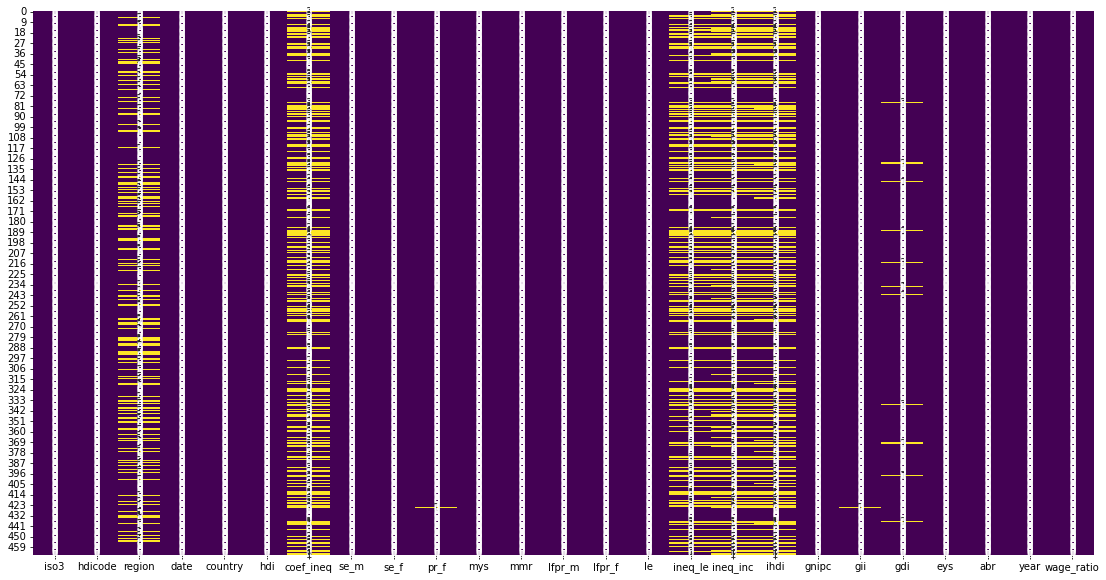

In [121]:
plt.figure(figsize=(19, 10))

# setting the parameter values
sns.heatmap(paygap.isnull(),cbar=False,cmap='viridis', annot = True)

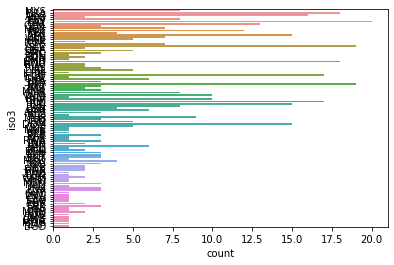

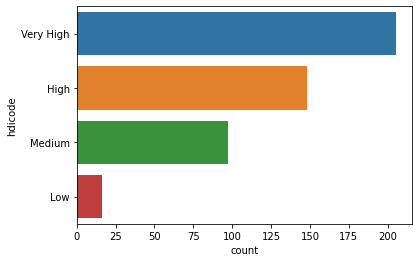

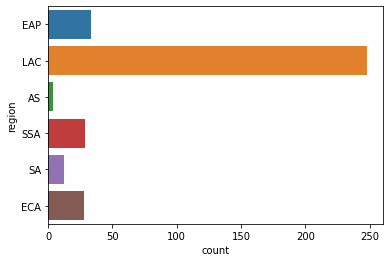

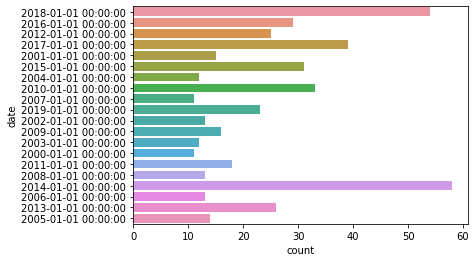

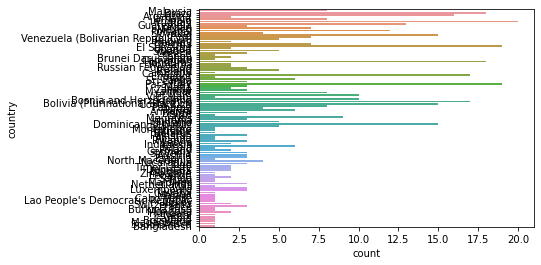

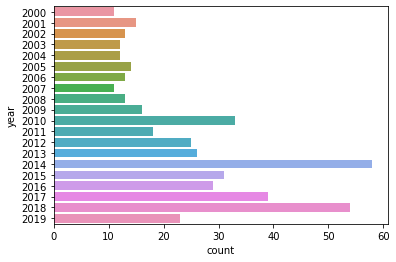

In [122]:
# Plot of each categorical features < 100
for column in paygap.select_dtypes(include='object'):
    if paygap[column].nunique() < 100:
        sns.countplot(y=column, data=paygap)
        plt.show()

# Data Preparation

## Drop selected variables

In [123]:
# Drop selected variables 
paygap.drop(["coef_ineq","ineq_le","ineq_inc","ihdi","iso3","gdi", "gii", "hdi", "hdicode"], axis=1, inplace=True)
paygap.columns

Index(['region', 'date', 'country', 'se_m', 'se_f', 'pr_f', 'mys', 'mmr',
       'lfpr_m', 'lfpr_f', 'le', 'gnipc', 'eys', 'abr', 'year', 'wage_ratio'],
      dtype='object')

In [124]:
# Fill in missing regions 
region_uniq = paygap["region"].sort_values().unique()
print(f"paygap region : {region_uniq}")

paygap["region"].fillna("No Region", inplace = True)
paygap["region"].sort_values().unique()

paygap region : ['AS' 'EAP' 'ECA' 'LAC' 'SA' 'SSA' nan]


array(['AS', 'EAP', 'ECA', 'LAC', 'No Region', 'SA', 'SSA'], dtype=object)

In [125]:
# Fill in the missing remaining values
paygap["pr_f"].fillna(0, inplace = True)

In [126]:
# to know just the missing values
print(paygap.isnull().sum())

region        0
date          0
country       0
se_m          0
se_f          0
pr_f          0
mys           0
mmr           0
lfpr_m        0
lfpr_f        0
le            0
gnipc         0
eys           0
abr           0
year          0
wage_ratio    0
dtype: int64


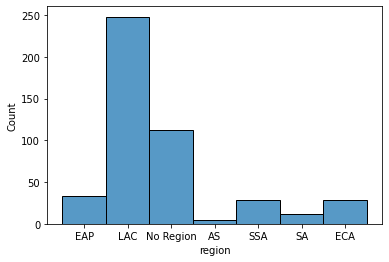

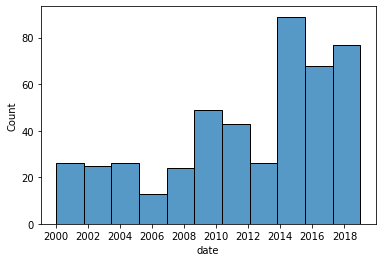

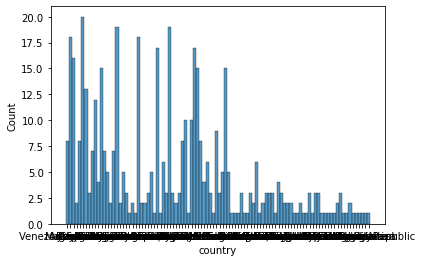

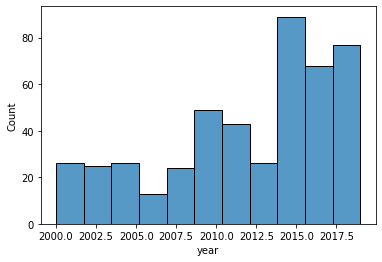

In [127]:
# based on version that replaces null values with 0
# histograms of variable distribution
for column in paygap.select_dtypes(include='object'):
    if paygap[column].nunique() < 100:
        sns.histplot(data = paygap[column])
        plt.show()


The year with the most complete data is: 2014


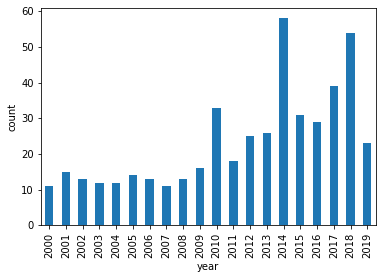

In [128]:
# determine year with the most complete data
count = paygap.groupby(by='year')['wage_ratio'].count()
count.plot.bar()
plt.ylabel('count')
print('The year with the most complete data is:',count.idxmax())

In [129]:
# check for duplicates
print('before dropping duplicates:', paygap.count())

# after dropping duplicates
paygap.drop_duplicates()
print('after dropping duplicates:', paygap.count())

before dropping duplicates: region        466
date          466
country       466
se_m          466
se_f          466
pr_f          466
mys           466
mmr           466
lfpr_m        466
lfpr_f        466
le            466
gnipc         466
eys           466
abr           466
year          466
wage_ratio    466
dtype: int64
after dropping duplicates: region        466
date          466
country       466
se_m          466
se_f          466
pr_f          466
mys           466
mmr           466
lfpr_m        466
lfpr_f        466
le            466
gnipc         466
eys           466
abr           466
year          466
wage_ratio    466
dtype: int64


## Encoding categorical variables

In [131]:
# Make a copy of dataframe for additional transformation
paygap_enc = paygap.copy()

# one-hot encoding of categorical data to integer values except for country
paygap_enc = pd.get_dummies(paygap_enc, columns = ['region'])
paygap_enc.dtypes

date                 object
country              object
se_m                float64
se_f                float64
pr_f                float64
mys                 float64
mmr                 float64
lfpr_m              float64
lfpr_f              float64
le                  float64
gnipc               float64
eys                 float64
abr                 float64
year                 object
wage_ratio          float64
region_AS             uint8
region_EAP            uint8
region_ECA            uint8
region_LAC            uint8
region_No Region      uint8
region_SA             uint8
region_SSA            uint8
dtype: object

In [132]:
paygap_enc.sample(10)

,date,country,se_m,se_f,pr_f,mys,mmr,lfpr_m,lfpr_f,le,...,abr,year,wage_ratio,region_AS,region_EAP,region_ECA,region_LAC,region_No Region,region_SA,region_SSA
267,2015-01-01 00:00:00,Czechia,99.789009,99.825150,19.572954,12.673340,4.0,68.015,51.247,78.5800,...,11.626,2015,0.788788,0,0,0,0,1,0,0
138,2014-01-01 00:00:00,Portugal,52.223122,50.775169,31.304348,8.870940,8.0,64.511,53.812,81.2157,...,9.063,2014,0.851852,0,0,0,0,1,0,0
449,2018-01-01 00:00:00,France,87.340656,82.714767,35.714286,11.509880,8.0,60.203,51.424,82.5909,...,8.166,2018,0.800000,0,0,0,0,1,0,0
53,2004-01-01 00:00:00,Uruguay,53.966106,56.322493,11.538462,8.631463,23.0,70.955,49.139,76.0069,...,64.987,2004,0.906874,0,0,0,1,0,0,0
148,2010-01-01 00:00:00,Latvia,98.788330,98.637360,20.000000,12.564560,26.0,65.003,53.889,72.9538,...,18.227,2010,0.853659,0,0,0,0,1,0,0
99,2012-01-01 00:00:00,Brazil,53.318249,55.808681,9.595960,7.215770,60.0,74.109,51.438,73.5517,...,63.675,2012,0.868132,0,0,0,1,0,0,0
415,2014-01-01 00:00:00,Slovenia,98.393570,96.835442,26.923077,12.428360,7.0,63.279,52.202,80.9406,...,4.966,2014,0.934066,0,0,0,0,1,0,0
62,2003-01-01 00:00:00,Guatemala,18.562954,14.795635,8.227848,3.799302,137.0,85.948,42.231,68.7969,...,99.616,2003,0.900990,0,0,0,1,0,0,0
213,2018-01-01 00:00:00,Portugal,54.814079,53.865379,34.782609,9.144710,8.0,64.400,54.480,81.3947,...,7.558,2018,0.925926,0,0,0,0,1,0,0
144,2016-01-01 00:00:00,Honduras,32.879601,34.357441,25.781250,6.528710,65.0,81.006,46.066,72.5878,...,76.868,2016,1.257971,0,0,0,1,0,0,0


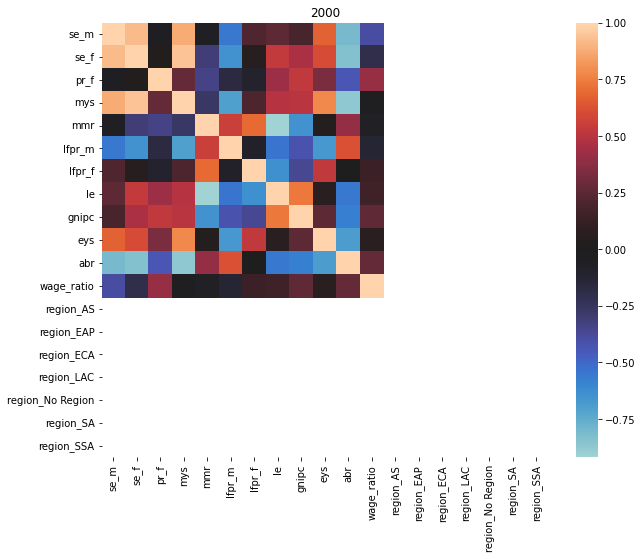

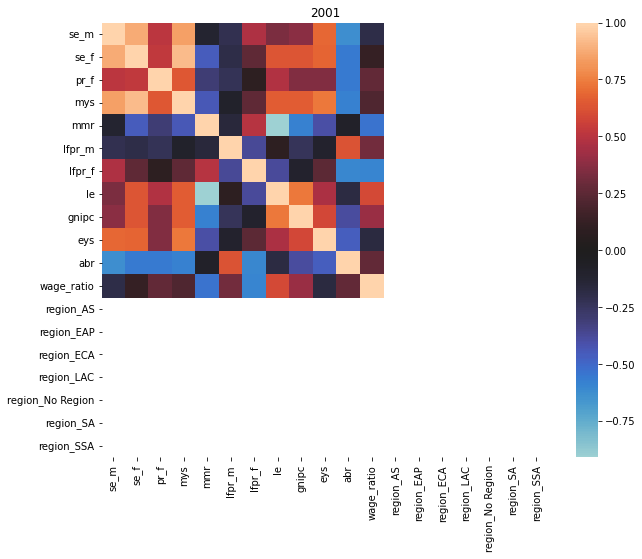

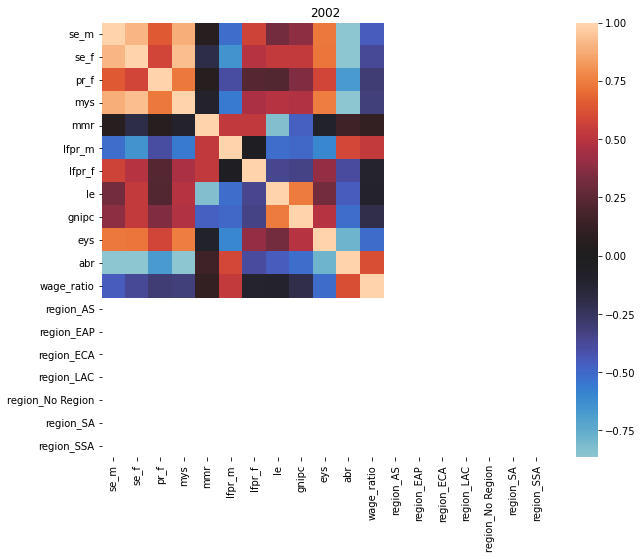

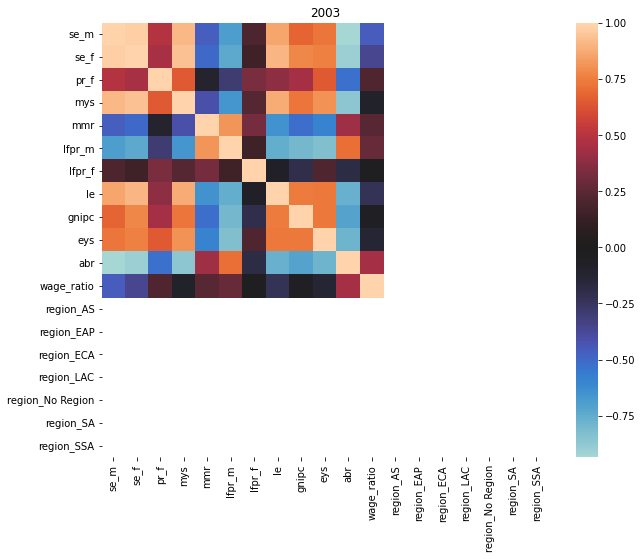

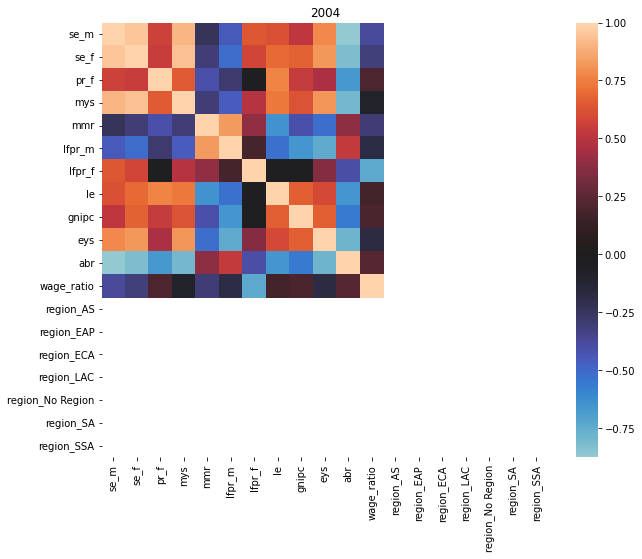

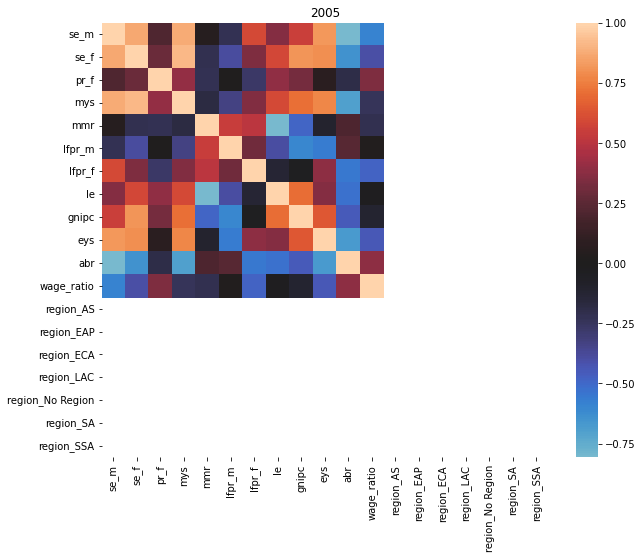

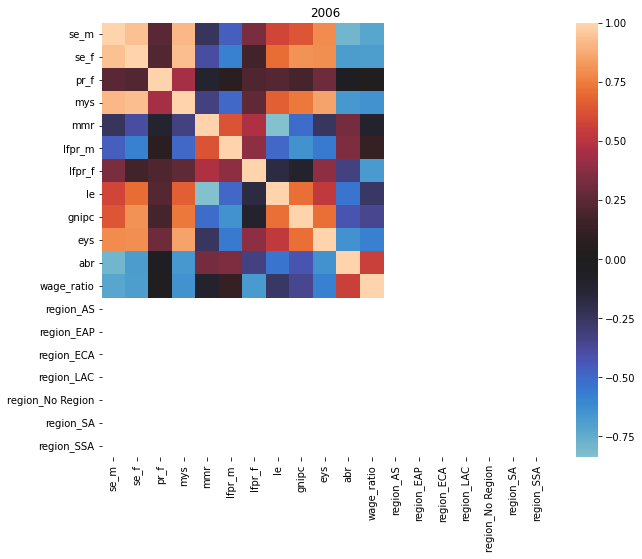

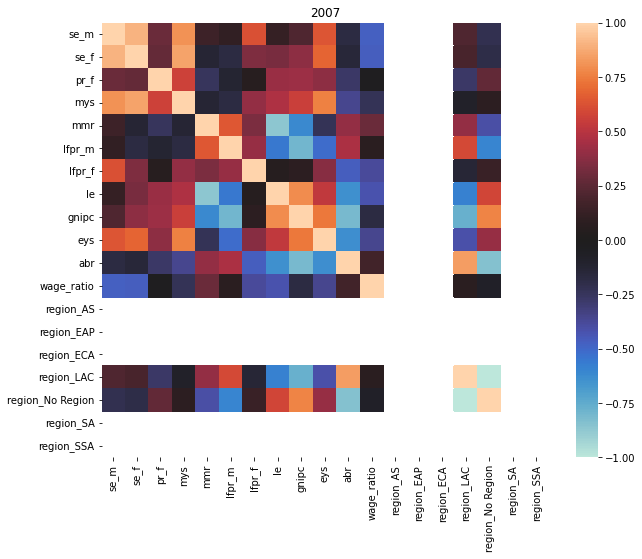

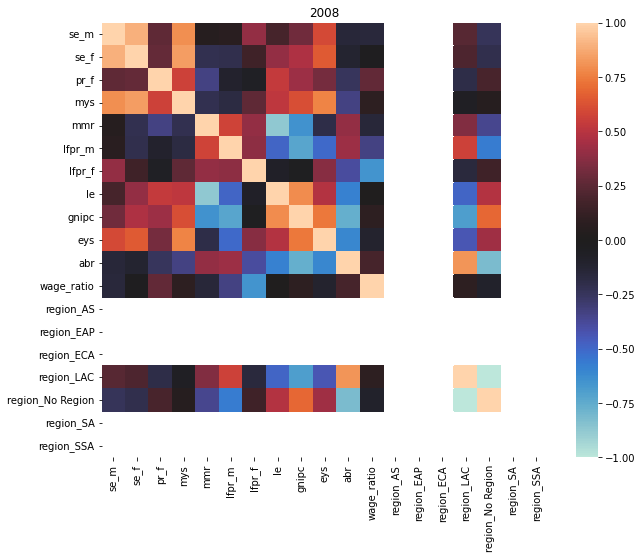

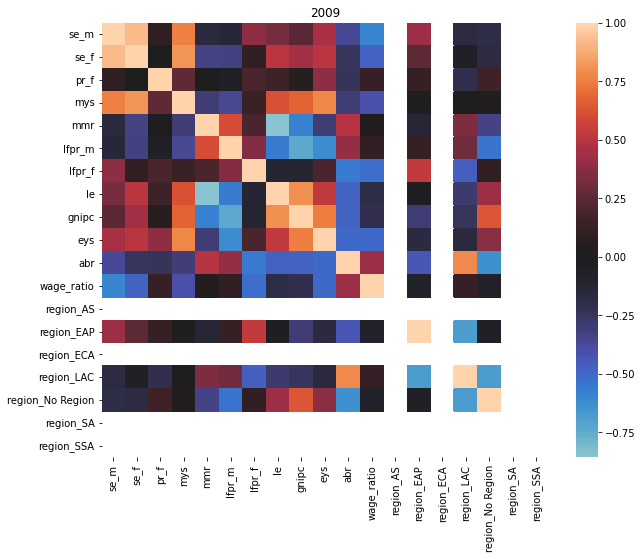

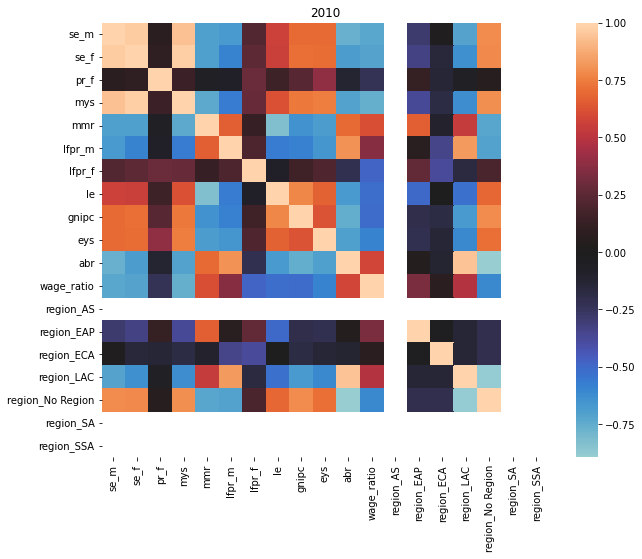

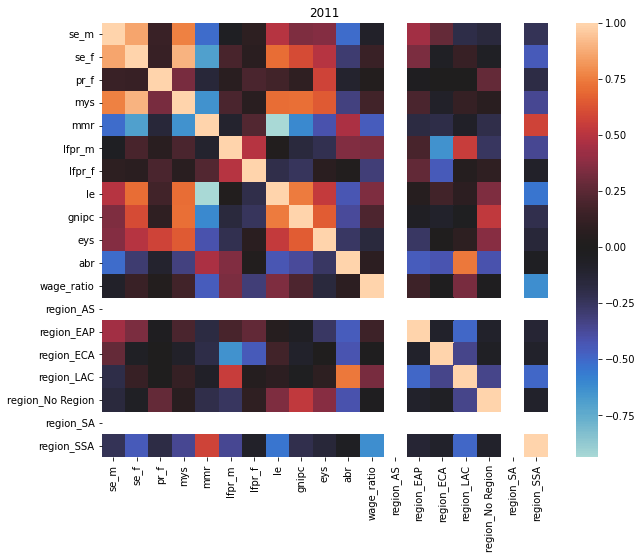

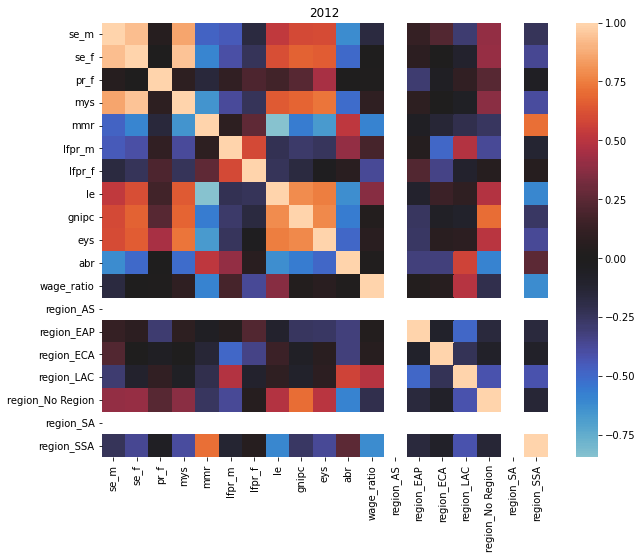

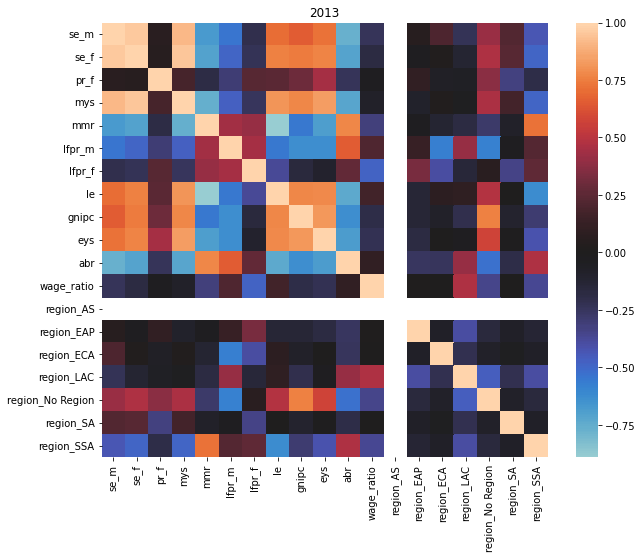

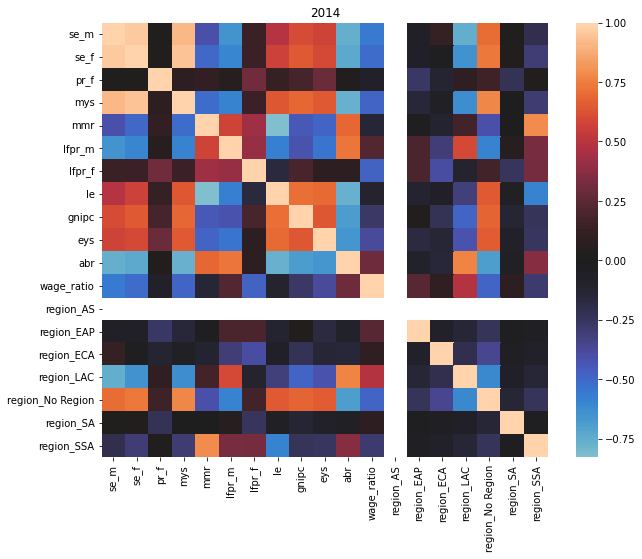

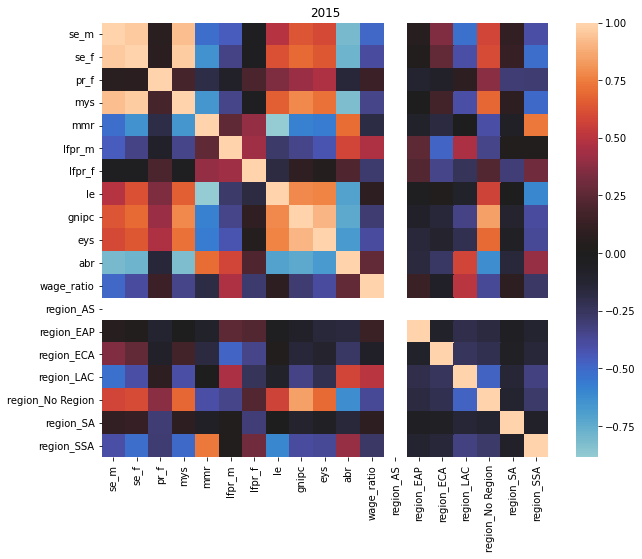

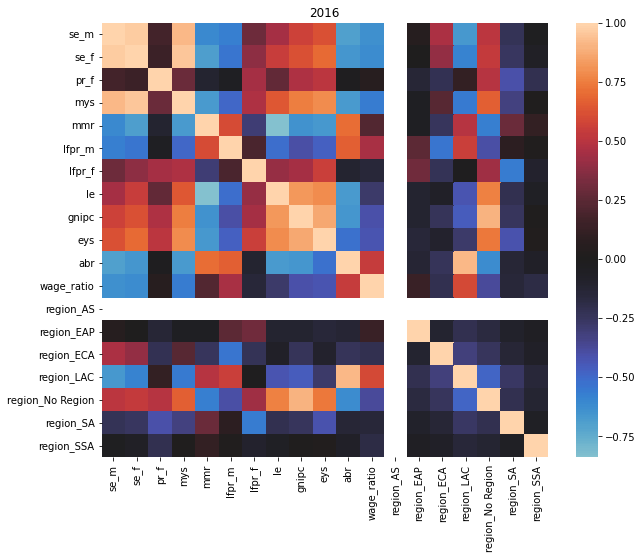

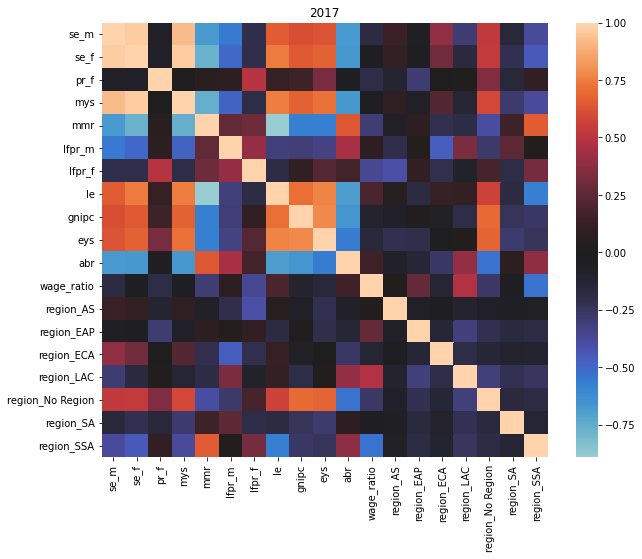

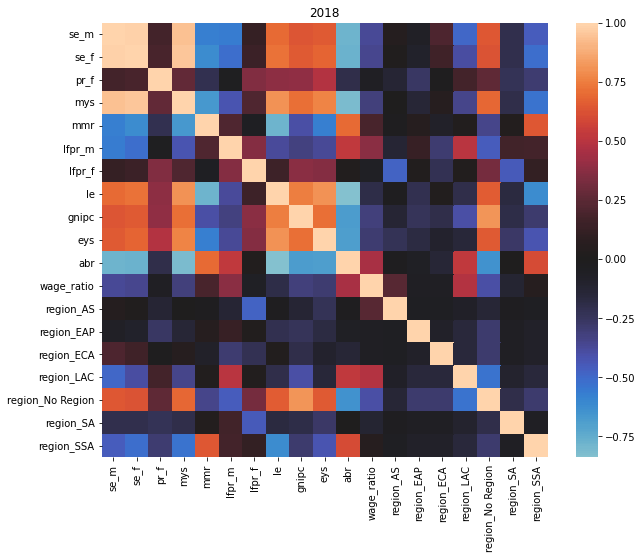

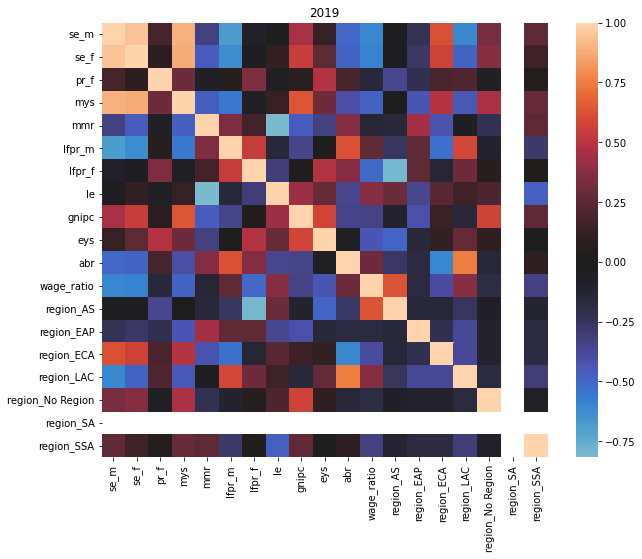

In [133]:
for year in np.sort(paygap_enc['year'].unique()):
  corr_matrix = paygap_enc.loc[paygap_enc['year']==year].corr()
  fig, ax = plt.subplots(figsize=(10,8)) 
  sns.heatmap(data = corr_matrix, center = 0)
  plt.title(str(year))

# Train/Test data

In [141]:
train_year = ['2000','2001']
test_year = ['2018', '2019']
paygap_train = paygap_enc.loc[paygap_enc['year'].isin([train_year])]
paygap_test = paygap_enc.loc[paygap_enc['year'].isin([test_year])]
print(len(paygap_train))
print(len(paygap_test))

0
0


# New Approach to prepare data for Principal Component Analysis (PCA)
## By implementing the Factorial Analysis of Mixed Data (FAMD)

FAMD generalizes PCA for datasets containing both numerical and categorical values.

For more information, please see [here](https://towardsdatascience.com/famd-how-to-generalize-pca-to-categorical-and-numerical-data-2ddbeb2b9210), and an example of the application of FAMD [here](https://medium.com/fifty-five-data-science/how-to-delete-bias-in-your-dataset-before-applying-a-clustering-ff1dfd14d179).

Steps of FAMD:

1. Standardize numerical columns by obtaining the z-score
2. Divide one-hot encoded categorical columns by the square root of its probability
3. Center the columns
4. Apply PCA on the new table

More resources:
[Plot for explained variance](https://vitalflux.com/pca-explained-variance-concept-python-example/), [2D projection of PCA](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60), [Centering data for categorical variables](https://www.statology.org/center-data-in-python/)

Have not implemented yet:
[Visualize all the original dimensions](https://plotly.com/python/pca-visualization/), [PCA for time-series](https://stats.stackexchange.com/questions/158281/can-pca-be-applied-for-time-series-data)

In [ ]:
from scipy import stats

In [ ]:
# # feature extraction with Principal Component Analysis (PCA)
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# # split data into training and testing set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(paygap.select_dtypes('float'),test_size = 0.2, random_state = 0)

In [ ]:
# print(pca.components_)

In [ ]:
# print(pca.explained_variance_)

In [ ]:
# print(pca.explained_variance_ratio_)

In [ ]:
# numerical variables
X_n = pd.DataFrame(paygap_original.select_dtypes('float64'))
target = X_n['wage_ratio']
X_n = X_n.drop(columns=['wage_ratio'])
X_n.sample(10)
# standard scale the numerical variables
X_n_nor = stats.zscore(X_n)
X_n_nor.sample(10)

,hdi,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,gnipc,gii,gdi,abr
date,,,,,,,,,,,,,
2013-01-01,0.858832,0.203443,0.329508,1.356716,0.849465,-0.297018,-0.093213,-0.297763,0.384654,0.337687,0.077129,0.354139,0.481427
2013-01-01,0.356117,0.061139,0.310819,-1.216942,0.365270,-0.081669,0.529453,-0.284268,0.490002,0.398274,0.912712,0.340945,1.146353
2002-01-01,-0.740715,-1.060065,-0.893025,-1.003886,-0.739204,0.172833,1.013649,0.176667,-0.492008,-0.657191,0.955406,0.347542,1.140654
2002-01-01,-1.718723,-1.951812,-1.664373,-1.484988,-1.642328,0.055370,1.381834,-0.794185,-0.987452,-0.983251,1.290859,-0.101049,1.839923
2016-01-01,1.718017,1.285502,1.373902,1.938386,1.464009,-0.688560,-0.824962,0.993473,1.510994,2.187075,-1.862398,0.281572,-1.387700
2008-01-01,-0.201439,-0.793614,-0.654757,0.270666,-0.432331,0.074948,0.956285,0.117288,0.094263,-0.584305,0.632151,-6.222992,1.104257
2011-01-01,-0.503068,-0.897246,-0.863609,-0.754074,-0.520437,0.280507,0.932544,0.349705,-0.454934,-0.562603,0.851720,0.149634,0.692142
2017-01-01,-0.402525,-0.062738,0.223434,-0.977799,0.220189,-0.375326,0.729009,-0.195600,-0.179334,-0.802948,0.430880,0.241991,0.494735
2015-01-01,0.017927,-0.244198,0.040454,-1.008065,-0.521134,-0.111035,-0.072680,0.093796,-0.031018,-0.267909,0.571160,0.301363,0.286624


In [ ]:
# categorical variables
X_c = pd.DataFrame(paygap_original.select_dtypes('object'))
X_c.sample(10)
# one-hot encode columns
X_c_nor = pd.get_dummies(X_c)
X_c_nor.sample(10)

,hdicode_High,hdicode_Low,hdicode_Medium,hdicode_Very High,region_AS,region_EAP,region_ECA,region_LAC,region_No Region,region_SA,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-01,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-01,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2018-01-01,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2002-01-01,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009-01-01,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-01,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2015-01-01,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# probability for each one-hot encoded column
# 129 columns in total
# derive probability for each column
import math
probability = [] #square root of probability
for (columnname, columnData) in X_c_nor.iteritems():
  # print(columnData.values)
  p = math.sqrt(sum(columnData.values)/len(columnData.values))
  probability.append(p) 
print(probability)
print(len(probability))
# transform X_c_nor
test = X_c_nor / probability
print(test)
# center the columns
#create function to center data
center_function = lambda x: x - x.mean()
#apply function to original NumPy array
data_centered = center_function(test)

[0.5635570658980377, 0.18529642184483178, 0.4562395274828434, 0.6632602529099183, 0.09264821092241589, 0.2661117258667435, 0.24512412551577056, 0.7295127423162098, 0.4902482510315411, 0.16047140854798211, 0.24946294245168432, 0.046324105461207944, 0.18529642184483178, 0.11347042117083507, 0.08023570427399106, 0.046324105461207944, 0.046324105461207944, 0.10358384880813022, 0.08023570427399106, 0.1909991798288123, 0.1464896838272619, 0.046324105461207944, 0.19653653462412551, 0.06551217820804184, 0.06551217820804184, 0.046324105461207944, 0.046324105461207944, 0.046324105461207944, 0.046324105461207944, 0.046324105461207944, 0.13102435641608368, 0.10358384880813022, 0.1794124889792144, 0.046324105461207944, 0.08023570427399106, 0.12256206275788528, 0.06551217820804184, 0.1794124889792144, 0.1909991798288123, 0.20192209435532607, 0.08023570427399106, 0.10358384880813022, 0.08023570427399106, 0.046324105461207944, 0.06551217820804184, 0.046324105461207944, 0.08023570427399106, 0.167023937

In [ ]:
# # scale the dataset
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = pd.concat([X_n,test],axis=1)
# sc.fit(X)
# X_nor = sc.transform(X)
# print(X_nor)
# X = X_nor

In [ ]:
X=pd.concat([X_n_nor,data_centered],axis=1)
X=pd.concat([X_n_nor,X_c_nor],axis=1)
X.sample(10)

,hdi,se_m,se_f,pr_f,mys,mmr,lfpr m,lfpr f,le,gnipc,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,-2.257999,-1.366153,-1.328879,-0.131158,-1.561446,2.825532,1.971005,3.278253,-1.955693,-1.148618,...,0,0,0,0,0,1,0,0,0,0
2006-01-01,-1.554198,-1.883428,-1.600918,0.130214,-1.557309,0.026005,1.020964,-1.209036,-0.815198,-0.948993,...,0,0,0,0,0,0,0,0,0,0
2015-01-01,-1.024063,-1.336973,-1.410649,-0.724945,-1.209297,0.280507,1.326137,-1.209036,-0.460404,-0.721841,...,0,0,0,0,0,1,0,0,0,0
2003-01-01,0.173312,-0.148487,0.094147,-0.939385,0.062525,-0.502577,-0.505800,-0.144918,0.248742,-0.422595,...,0,0,0,0,0,0,0,0,0,0
2019-01-01,0.182452,0.675480,0.827137,0.209930,0.207112,0.202199,0.542543,0.170469,-0.176580,-0.082781,...,0,0,0,0,0,0,0,0,0,1
2015-01-01,1.580913,1.102511,1.030074,1.833031,1.253810,-0.678771,-1.921943,-0.279770,1.231869,2.068726,...,0,0,0,0,0,1,0,0,0,0
2006-01-01,-0.960081,-1.000430,-1.405590,-0.478413,-1.241170,-0.140401,0.332079,-0.567166,-0.716513,-0.785793,...,0,0,0,0,0,0,0,0,0,0
2017-01-01,0.493221,0.265939,0.101170,-0.934374,0.452833,-0.130612,-0.131071,-0.620347,0.074657,0.312551,...,0,0,0,0,0,0,0,1,0,0
2016-01-01,1.480370,1.307555,1.311545,0.420482,1.723643,-0.698348,-0.610263,0.856922,1.539170,1.267225,...,0,0,0,0,0,0,1,0,0,0


[5.01078174e-01 9.16513893e-02 6.50630206e-02 5.82494753e-02
 4.92270692e-02 3.57953689e-02 2.64547800e-02 1.73998425e-02
 1.27527316e-02 1.08232048e-02 7.51004615e-03 6.26096877e-03
 5.75302011e-03 5.39402934e-03 5.06061224e-03 4.70950889e-03
 4.37504157e-03 4.07777295e-03 3.85903549e-03 3.53890703e-03
 3.47343939e-03 3.36336002e-03 3.24096183e-03 3.00957078e-03
 2.64397483e-03 2.45995636e-03 2.42075479e-03 2.30087157e-03
 2.15428525e-03 2.13105281e-03 2.06205637e-03 2.02052054e-03
 1.95683541e-03 1.86651811e-03 1.81583876e-03 1.73500791e-03
 1.66625204e-03 1.62788469e-03 1.58695360e-03 1.56072139e-03
 1.51938253e-03 1.49013700e-03 1.39349504e-03 1.35249024e-03
 1.31275928e-03 1.22195678e-03 1.13235761e-03 1.07719640e-03
 1.06112654e-03 9.49011827e-04 9.20241916e-04 8.77421032e-04
 8.21098826e-04 7.93354155e-04 7.44157387e-04 7.19937622e-04
 6.77528717e-04 6.65854583e-04 6.46653092e-04 5.92390968e-04
 5.73480583e-04 5.70245762e-04 5.39924801e-04 5.07192510e-04
 4.87074334e-04 4.556444

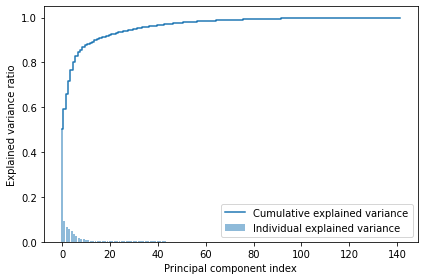

In [ ]:
# Apply PCA algorithm
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(explained_variance)
# Create the visualization plot
plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
print(principalDf)

[0.50107817 0.09165139]
     principal component 1  principal component 2
0                -1.784815              -0.046692
1                 0.680391              -0.659103
2                -1.017823               0.477145
3                -1.627065              -0.215214
4                 1.719259              -0.251328
..                     ...                    ...
461              -1.660524               0.503967
462               2.791907              -0.410111
463               0.542922              -0.132186
464               0.940095               2.564443
465              -0.720957              -2.792027

[466 rows x 2 columns]


In [ ]:
target = target.reset_index(drop = True)
finalDf = pd.concat([principalDf, target], axis = 1)

<Figure size 144x432 with 0 Axes>

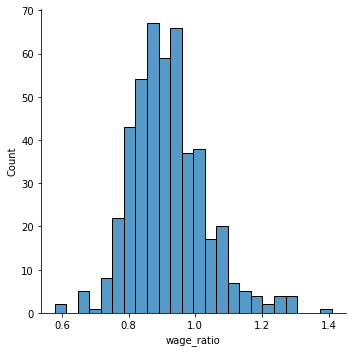

In [ ]:
# check target range
fig = plt.figure(figsize = (2,6))
sns.displot(target)

Try binning wage_ratio to get 3 categories.

In [ ]:
max_wr = max(target)
min_wr = min(target)
low_wr = np.percentile(target, 33)
med_wr = np.percentile(target, 66)
print('max:', max(target))
print('min:', min(target))
print('low:', np.percentile(target, 33))
print('med:', np.percentile(target, 66))
# group wage_ratio into 3 categories
target_gr_low = target[(target>=min_wr) & (target<low_wr)].index.tolist()
print(target_gr_low)
target_gr_med = target[(target>=low_wr) & (target<med_wr)].index.tolist()
print(target_gr_med)
target_gr_high = target[(target>=med_wr) & (target<=max_wr)].index.tolist()
print(target_gr_high)

max: 1.4096690360222364
min: 0.5784313725490196
low: 0.8657940099116569
med: 0.9490013619580706
[12, 16, 19, 24, 26, 27, 29, 30, 35, 36, 39, 42, 43, 44, 45, 46, 50, 56, 57, 63, 64, 74, 77, 79, 82, 83, 89, 90, 93, 94, 95, 98, 101, 102, 103, 109, 110, 113, 119, 120, 121, 122, 125, 128, 130, 133, 135, 138, 146, 147, 148, 155, 159, 160, 163, 165, 171, 172, 173, 175, 179, 181, 182, 183, 185, 186, 187, 189, 194, 195, 196, 200, 203, 204, 205, 206, 214, 219, 227, 229, 232, 233, 234, 243, 244, 245, 250, 251, 252, 253, 256, 258, 260, 263, 267, 268, 272, 278, 279, 280, 292, 298, 299, 301, 303, 305, 306, 307, 320, 330, 334, 336, 340, 345, 348, 351, 352, 354, 357, 363, 366, 368, 369, 370, 375, 376, 377, 378, 381, 382, 383, 385, 389, 392, 395, 399, 401, 405, 408, 413, 417, 420, 423, 426, 429, 432, 437, 438, 442, 446, 447, 448, 449, 454]
[1, 4, 5, 11, 18, 23, 25, 31, 33, 38, 47, 51, 52, 53, 55, 58, 59, 60, 62, 66, 67, 70, 71, 72, 78, 88, 96, 97, 99, 104, 108, 115, 117, 123, 124, 126, 127, 131, 134, 1

In [ ]:
target_cat = pd.DataFrame(np.zeros((len(target),1)))
for i in target_gr_low:
  target_cat.loc[i] = 'low'
for i in target_gr_med:
  target_cat.loc[i] = 'med'
for i in target_gr_high:
  target_cat.loc[i] = 'high'
print(target_cat)

        0
0    high
1     med
2    high
3    high
4     med
..    ...
461  high
462   med
463  high
464   med
465  high

[466 rows x 1 columns]


In [ ]:
target_cat = target_cat.reset_index(drop = True)
target_cat.columns = ['target']
finalDf = pd.concat([principalDf, target_cat], axis = 1)
print(finalDf)

     principal component 1  principal component 2 target
0                -1.784815              -0.046692   high
1                 0.680391              -0.659103    med
2                -1.017823               0.477145   high
3                -1.627065              -0.215214   high
4                 1.719259              -0.251328    med
..                     ...                    ...    ...
461              -1.660524               0.503967   high
462               2.791907              -0.410111    med
463               0.542922              -0.132186   high
464               0.940095               2.564443    med
465              -0.720957              -2.792027   high

[466 rows x 3 columns]


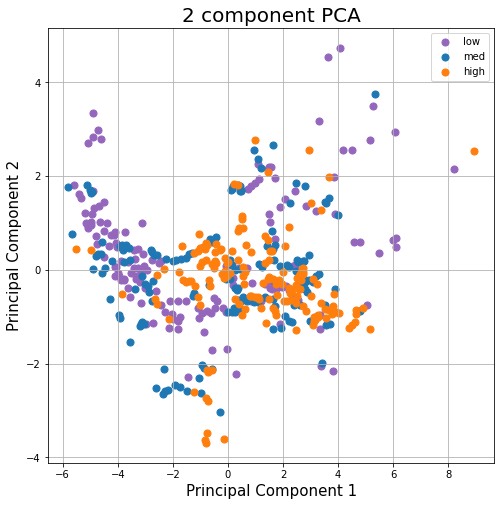

In [ ]:
# Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low', 'med', 'high']
colors = ['tab:purple', 'tab:blue', 'tab:orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()